# ML opdracht 3

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ML-les-2" data-toc-modified-id="ML-les-2-1">ML les 2</a></span><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1.1">Dataset</a></span></li><li><span><a href="#Analyse-Probleem" data-toc-modified-id="Analyse-Probleem-1.2">Analyse Probleem</a></span><ul class="toc-item"><li><span><a href="#Wat-is-het-probleem" data-toc-modified-id="Wat-is-het-probleem-1.2.1">Wat is het probleem</a></span></li><li><span><a href="#Dimensie-dataset" data-toc-modified-id="Dimensie-dataset-1.2.2">Dimensie dataset</a></span></li><li><span><a href="#Soorten-data/features" data-toc-modified-id="Soorten-data/features-1.2.3">Soorten data/features</a></span></li></ul></li><li><span><a href="#Voorspelling" data-toc-modified-id="Voorspelling-1.3">Voorspelling</a></span><ul class="toc-item"><li><span><a href="#Welke-classifier-zal-het-beste-zijn-en-waarom?" data-toc-modified-id="Welke-classifier-zal-het-beste-zijn-en-waarom?-1.3.1">Welke classifier zal het beste zijn en waarom?</a></span></li><li><span><a href="#Welke-hyperparameters-zijn-relevant-en-waarom?" data-toc-modified-id="Welke-hyperparameters-zijn-relevant-en-waarom?-1.3.2">Welke hyperparameters zijn relevant en waarom?</a></span></li></ul></li><li><span><a href="#Methoden" data-toc-modified-id="Methoden-1.4">Methoden</a></span><ul class="toc-item"><li><span><a href="#Welke-preprocessing-stappen-zijn-nodig?" data-toc-modified-id="Welke-preprocessing-stappen-zijn-nodig?-1.4.1">Welke preprocessing stappen zijn nodig?</a></span></li><li><span><a href="#Welke-classifiers-ga-je-vergelijken?-(Minimaal-2-per-dataset)" data-toc-modified-id="Welke-classifiers-ga-je-vergelijken?-(Minimaal-2-per-dataset)-1.4.2">Welke classifiers ga je vergelijken? (Minimaal 2 per dataset)</a></span></li><li><span><a href="#Welke-performance-metric-is-passend?" data-toc-modified-id="Welke-performance-metric-is-passend?-1.4.3">Welke performance metric is passend?</a></span></li></ul></li><li><span><a href="#Resultaten" data-toc-modified-id="Resultaten-1.5">Resultaten</a></span><ul class="toc-item"><li><span><a href="#Let-op:-Niet-alleen-beste-resultaat-geven,-het-gaat-juist-ook-om-de-vergelijking/verbetering!" data-toc-modified-id="Let-op:-Niet-alleen-beste-resultaat-geven,-het-gaat-juist-ook-om-de-vergelijking/verbetering!-1.5.1">Let op: Niet alleen beste resultaat geven, het gaat juist ook om de vergelijking/verbetering!</a></span></li><li><span><a href="#Minimaal-1-visualisatie/plotje-per-dataset." data-toc-modified-id="Minimaal-1-visualisatie/plotje-per-dataset.-1.5.2">Minimaal 1 visualisatie/plotje per dataset.</a></span></li></ul></li><li><span><a href="#Evaluatie/conclusie" data-toc-modified-id="Evaluatie/conclusie-1.6">Evaluatie/conclusie</a></span><ul class="toc-item"><li><span><a href="#Welke-classifier-leverde-beste-resultaat-op?" data-toc-modified-id="Welke-classifier-leverde-beste-resultaat-op?-1.6.1">Welke classifier leverde beste resultaat op?</a></span></li><li><span><a href="#Klopt-dit-met-je-voorspelling?-Waarom-wel/niet?" data-toc-modified-id="Klopt-dit-met-je-voorspelling?-Waarom-wel/niet?-1.6.2">Klopt dit met je voorspelling? Waarom wel/niet?</a></span></li></ul></li><li><span><a href="#Literatuurverwijzingen" data-toc-modified-id="Literatuurverwijzingen-1.7">Literatuurverwijzingen</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import zscore
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

## Dataset
Dit is de santander costumer transaction prediction dataset

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, QuantileTransformer

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [3]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
print(train.shape)
print(test.shape)

(200000, 202)
(200000, 201)


Waarde die zeker niet gebruikt wordt:
ID_code

Uit informatie weten we dat **target** het resultaat moet zijn.

In [5]:
X_train, y_train = train.drop(columns=["ID_code","target"]), train["target"]

Text(0.5, 1.0, 'Values that are true')

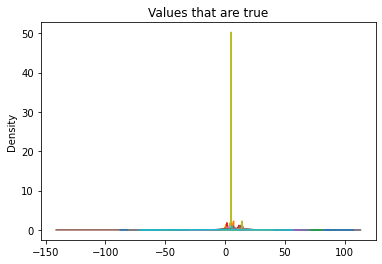

In [6]:
X_train[y_train==1].plot.kde(ind=150, legend=False)
plt.title("Values that are true")

<AxesSubplot:ylabel='Density'>

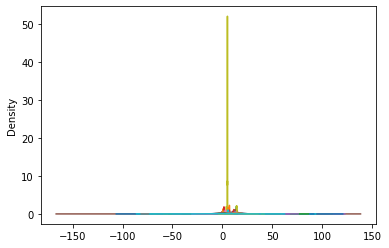

In [7]:
X_train[y_train==0].plot.kde(ind=75,legend=False)

### z scores
outlier filtering

In [8]:
z_scores = np.abs(zscore(train.iloc[:,1:]))
threshold = 3
df_train_rm = train[(z_scores < threshold).all(axis=1)]

In [9]:
X_trainZ=df_train_rm.iloc[:,2:]
y_trainZ=df_train_rm['target']
print(X_trainZ.shape)
print(y_trainZ.shape)
y_trainZ = y_trainZ.reset_index(drop=True)

(188969, 200)
(188969,)


Zoals je ziet is het niet makkelijk om de data te vergelijken. De waardes zien er wel al redleijk als een normaalcurve
uit dus dat is goed. Om de data duidelijker te maken moet de data gescaled worden

In [10]:
sc = StandardScaler()
scaled_data = sc.fit_transform(X_train)
scaled_data = pd.DataFrame(scaled_data)

scaled_z_data = sc.fit_transform(X_trainZ)
scaled_z_data = pd.DataFrame(scaled_z_data)
scaled_z_data.shape

(188969, 200)

In [11]:
y_train.shape

(200000,)

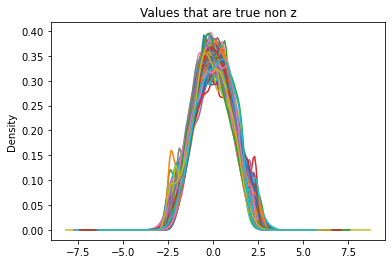

In [12]:
scaled_data[y_train==1].plot.kde(ind=150, legend=False)
plt.title("Values that are true non z")
plt.show()

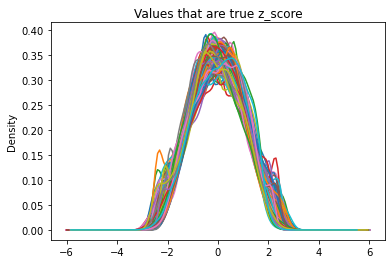

In [13]:
scaled_z_data[y_trainZ==1].plot.kde(ind=150, legend=False)
plt.title("Values that are true z_score")
plt.show()

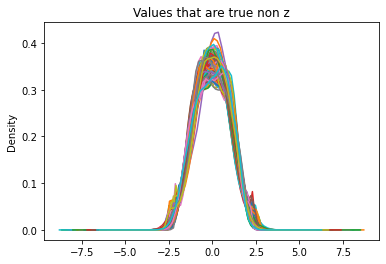

In [14]:
scaled_data[y_train==0].plot.kde(ind=75,legend=False)
plt.title("Values that are true non z")
plt.show()

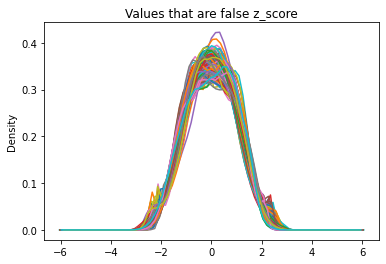

In [15]:
scaled_z_data[y_trainZ==0].plot.kde(ind=75, legend=False)
plt.title("Values that are false z_score")
plt.show()

### Plots
Hier kan je zien dat de true values extremer zijn dan de false values. Daarbij kan je een verschil zien tussen de zscores.
De plot van de zscores lijkt breder. Dit komt vooral omdat de plot niet meer de extreme outliers hoeft te plotten.
Hierdoor kunnen de waardes verbreed worden.


## Model
Gebruik pipeline in combinatie met gaussian Naive bayes om een inschatitng te maken.
Ik heb een QuantileTransformer gebruikt om de waarden in een normaal-distributie te vormen. Nu het netjes in een
normaal-distributie is gevormd kan een GaussianNaiveBayes gebruikt worden.

In [16]:
pipeline = make_pipeline(QuantileTransformer(output_distribution='normal'), GaussianNB())
pipeline.fit(X_train, y_train)

Pipeline(steps=[('quantiletransformer',
                 QuantileTransformer(output_distribution='normal')),
                ('gaussiannb', GaussianNB())])

In [17]:
flrc = LogisticRegression(random_state=3).fit(scaled_data,y_train)

In [18]:
zlrc = LogisticRegression(random_state=3).fit(scaled_z_data,y_trainZ)

In [19]:
y_trainZ = y_trainZ.to_numpy()

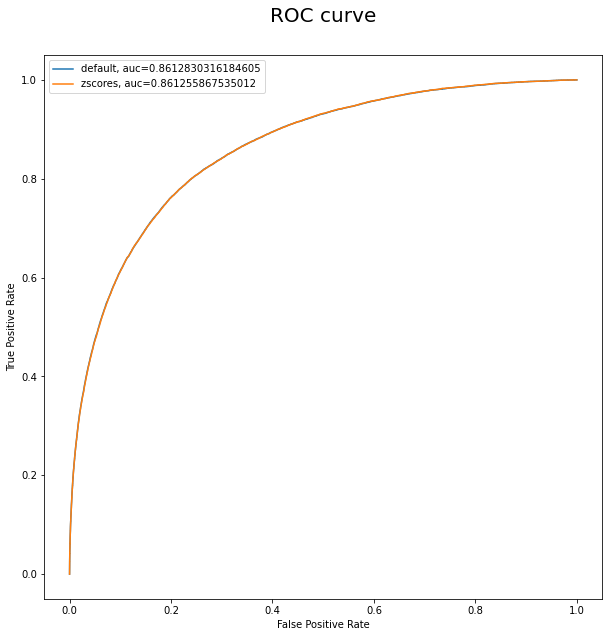

In [22]:
plt.figure(figsize=(10, 10))
fpr, tpr, thr = roc_curve(y_train, flrc.predict_proba(scaled_data)[:,1])
fprz, tprz, thrz = roc_curve(y_trainZ, zlrc.predict_proba(scaled_z_data)[:,1])
plt.plot(fpr, tpr,label="default, auc="+str(auc(fpr, tpr)))
plt.plot(fprz,tprz,label="z scores, auc="+str(auc(fprz,tprz)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC curve', fontsize=20, y=1.05)
plt.show()

0.8911139407409636

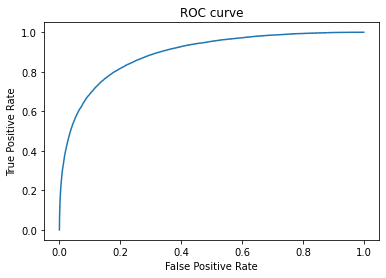

In [21]:
fpr, tpr, thr = roc_curve(y_train, pipeline.predict_proba(X_train)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
auc(fpr, tpr)

## Conclusie
Zoals je ziet zijn de resultaten van beide LR goed. En misschien bij de niet z-score gefilterde data wel beter.
Maar bij de gefilterde data op de z-scores heb je minder kans om op outliers te fitten en daardoor een model die minder
snel aan overfitting lijdt.